In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from matplotlib import pyplot as plt

In [2]:
X = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])

In [3]:
class LinearRegressionDataset(data.Dataset):
    def __init__(self, X, y):
        super().__init__()
        # note
        self.X = X.reshape(-1, 1)
        self.y = y.reshape(-1, 1)
    
    def __len__(self):
        return len(self.X)
    
    # note
    def __getitem__(self, ind):
        return self.X[ind], self.y[ind]

In [4]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # note
        self.w = nn.Parameter(torch.rand(1))
        self.b = nn.Parameter(torch.rand(1))

    def forward(self, x):
        return (self.w * x) + self.b

In [5]:
dataset = LinearRegressionDataset(X, y)
# batch_size is kept 1 as data is small. So treating it as stochastic gradient descent only
batch_size = len(dataset)
dataloader = data.DataLoader(dataset, batch_size=batch_size, shuffle= True)

In [6]:
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr= 0.001)

In [7]:
loss_list = []
for epoch in range(100):
    # setting model to training mode
    model.train()
    running_loss = 0.0
    for input, target in dataloader:
        optimizer.zero_grad()
        output = model(input)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'parameters = w = {model.w.item()}, b = {model.b.item()}, loss = {loss.item()}')
    loss_list.append(running_loss)
        

parameters = w = 5.100453853607178, b = 0.8587992191314697, loss = 26005.55859375
parameters = w = 7.840723991394043, b = 1.0506707429885864, loss = 11225.376953125
parameters = w = 9.618391036987305, b = 1.1763920783996582, loss = 5004.7255859375
parameters = w = 10.771568298339844, b = 1.2591979503631592, loss = 2386.58544921875
parameters = w = 11.519607543945312, b = 1.3141618967056274, loss = 1284.66162109375
parameters = w = 12.004813194274902, b = 1.3510630130767822, loss = 820.8795776367188
parameters = w = 12.319504737854004, b = 1.376245379447937, loss = 625.677001953125
parameters = w = 12.523575782775879, b = 1.393824815750122, loss = 543.5131225585938
parameters = w = 12.655881881713867, b = 1.4064713716506958, loss = 508.92510986328125
parameters = w = 12.741630554199219, b = 1.4159172773361206, loss = 494.36065673828125
parameters = w = 12.797174453735352, b = 1.4232863187789917, loss = 488.2232360839844
parameters = w = 12.833123207092285, b = 1.4293075799942017, loss =

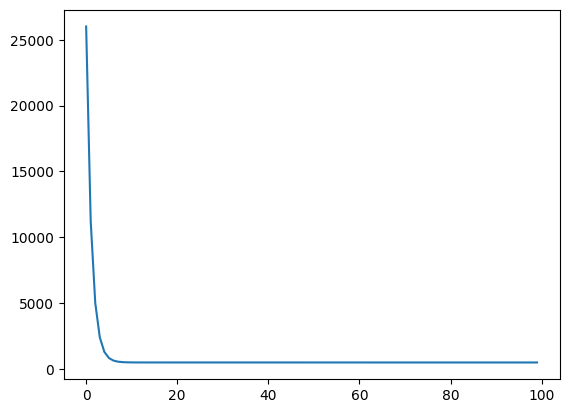

In [8]:
plt.plot(loss_list)
plt.show()